# Suicide Death Rates in the United States (1950 – 2018)
### Project Notebook

**Objective:** Explore long‑term trends and demographic patterns in U.S. suicide death rates, identify high‑risk groups, and generate insights for targeted prevention efforts.

**Dataset:** `Death_rates_for_suicide_by_sex_race_Hispanic_origin_and_age_United.csv` — historical age‑adjusted and crude suicide death rates from the CDC, stratified by sex, race/Hispanic origin, and age group.

## 1  Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')

# Display plots inline
%matplotlib inline

sns.set(style='whitegrid', context='talk')


## 2  Load & Inspect Data

In [2]:
# Adjust the path if necessary
DATA_PATH = 'Death_rates_for_suicide_by_sex_race_Hispanic_origin_and_age_United.csv'

df = pd.read_csv(DATA_PATH)
print('Shape:', df.shape)
display(df.head())
df.info()

Shape: (6390, 13)


,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6390 non-null   object 
 1   UNIT            6390 non-null   object 
 2   UNIT_NUM        6390 non-null   int64  
 3   STUB_NAME       6390 non-null   object 
 4   STUB_NAME_NUM   6390 non-null   int64  
 5   STUB_LABEL      6390 non-null   object 
 6   STUB_LABEL_NUM  6390 non-null   float64
 7   YEAR            6390 non-null   int64  
 8   YEAR_NUM        6390 non-null   int64  
 9   AGE             6390 non-null   object 
 10  AGE_NUM         6390 non-null   float64
 11  ESTIMATE        5484 non-null   float64
 12  FLAG            906 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 649.1+ KB


## 3  Data Cleaning & Feature Engineering

In [3]:
# Drop rows with missing rate estimates
df = df.dropna(subset=['ESTIMATE'])

# Helper columns to simplify analysis
def get_sex(label):
    if str(label).startswith('Male'):
        return 'Male'
    elif str(label).startswith('Female'):
        return 'Female'
    else:
        return 'All'

def get_race(label):
    races = [
        'White',
        'Black or African American',
        'American Indian or Alaska Native',
        'Asian or Pacific Islander',
        'Hispanic or Latino'
    ]
    for r in races:
        if r in label:
            return r
    return 'All races'

df['Sex'] = df['STUB_LABEL'].apply(get_sex)
df['Race'] = df['STUB_LABEL'].apply(get_race)

print('After cleaning:', df.shape)
display(df.head())

After cleaning: (5484, 15)


,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,Sex,Race
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN,All,All races
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN,All,All races
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN,All,All races
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN,All,All races
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN,All,All races


## 4  Exploratory Data Analysis

### 4.1 Overall Age‑Adjusted Trend

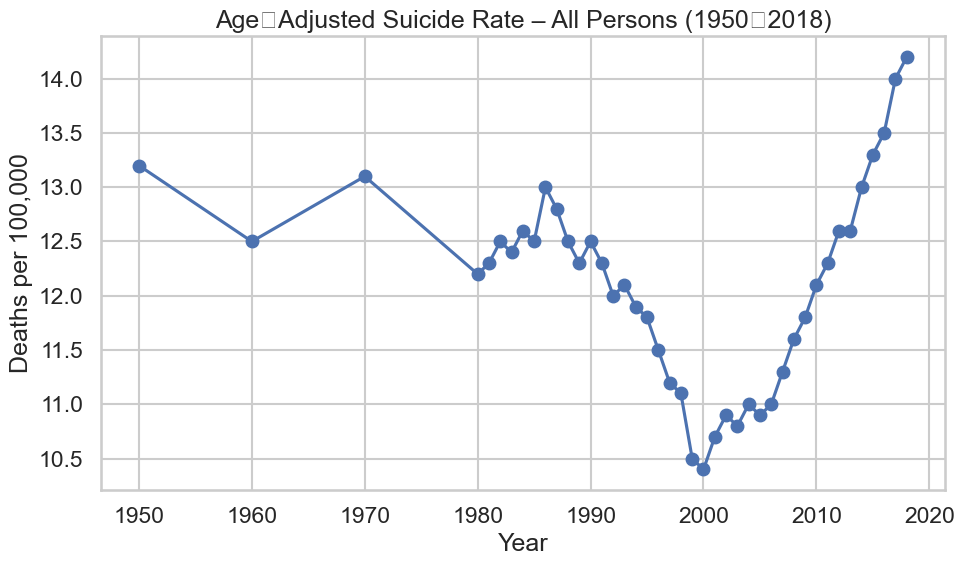

In [4]:
df_adj = df[df['UNIT_NUM'] == 1]  # 1 = age‑adjusted
overall = df_adj[df_adj['STUB_LABEL'] == 'All persons']

plt.figure(figsize=(10, 6))
plt.plot(overall['YEAR'], overall['ESTIMATE'], marker='o')
plt.title('Age‑Adjusted Suicide Rate – All Persons (1950‑2018)')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000')
plt.tight_layout()
plt.show()

### 4.2 Age‑Adjusted Trend by Sex

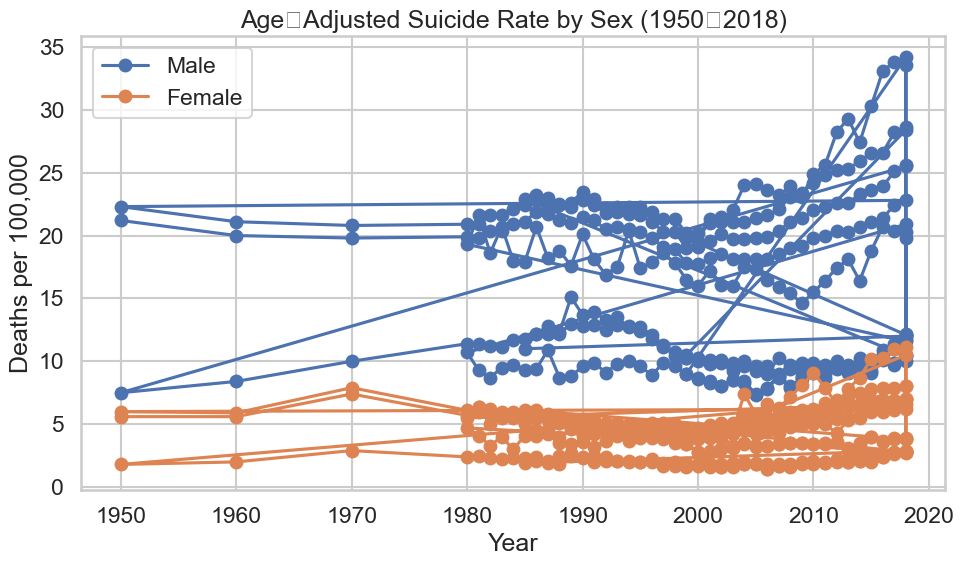

In [5]:
sex_trend = df_adj[df_adj['Sex'].isin(['Male', 'Female'])]

plt.figure(figsize=(10, 6))
for sex in ['Male', 'Female']:
    subset = sex_trend[sex_trend['Sex'] == sex]
    plt.plot(subset['YEAR'], subset['ESTIMATE'], marker='o', label=sex)
plt.title('Age‑Adjusted Suicide Rate by Sex (1950‑2018)')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000')
plt.legend()
plt.tight_layout()
plt.show()

### 4.3 Average Age‑Adjusted Rate by Race (2009‑2018)

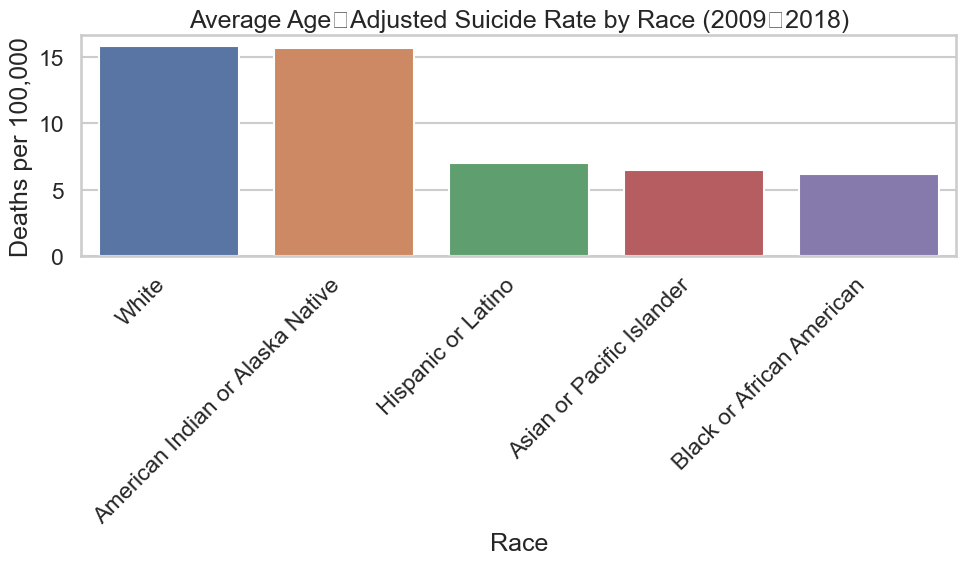

In [6]:
recent_adj = df_adj[df_adj['YEAR'] >= 2009]
race_avg = (recent_adj.groupby('Race')['ESTIMATE']
                      .mean()
                      .reset_index())
race_avg = race_avg[race_avg['Race'] != 'All races']

plt.figure(figsize=(10, 6))
sns.barplot(x='Race', y='ESTIMATE', data=race_avg, order=race_avg.sort_values('ESTIMATE', ascending=False)['Race'])
plt.title('Average Age‑Adjusted Suicide Rate by Race (2009‑2018)')
plt.ylabel('Deaths per 100,000')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4.4 Crude Rate by Age Group (Latest Year)

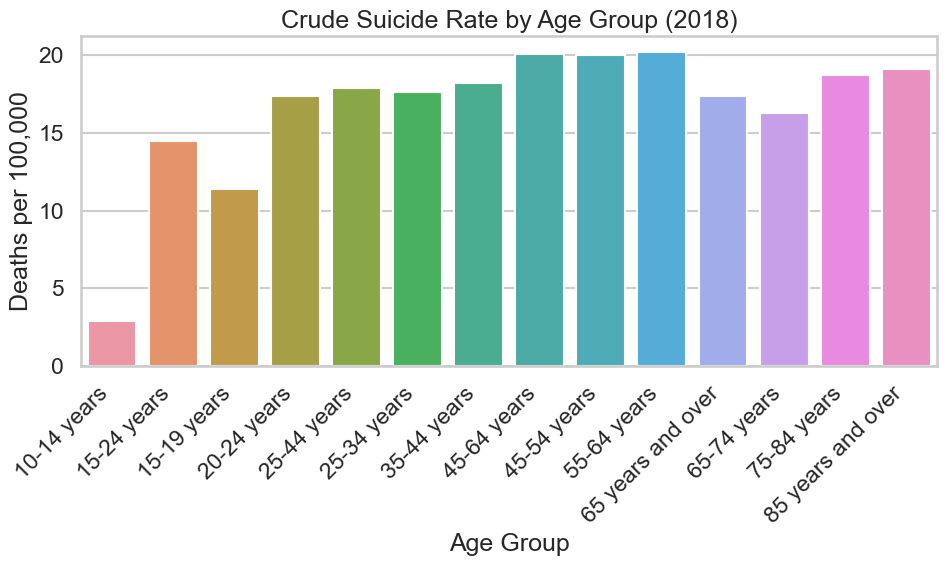

In [7]:
latest_year = df['YEAR'].max()
df_crude = df[df['UNIT_NUM'] == 2]  # 2 = crude rate
age_latest = df_crude[(df_crude['YEAR'] == latest_year) &
                      (df_crude['STUB_NAME'] == 'Age') &
                      (df_crude['AGE'] != 'All ages')]

plt.figure(figsize=(10, 6))
sns.barplot(x='AGE', y='ESTIMATE', data=age_latest)
plt.title(f'Crude Suicide Rate by Age Group ({latest_year})')
plt.ylabel('Deaths per 100,000')
plt.xlabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5  Summary & Insights
* National suicide rates declined mid‑century but have risen steadily since the late 1990s.
* Men consistently die by suicide at 3–4 times the rate of women.
* White and American Indian/Alaska Native populations suffer the highest age‑adjusted rates in the past decade.
* Risk escalates through middle age, peaking for adults aged 45–64 and remaining high for seniors.

### Next Steps
1. Build predictive models to forecast high‑risk counties or states.
2. Integrate socioeconomic and mental‑health‑service variables for deeper causal analysis.
3. Design targeted prevention campaigns for middle‑aged men in high‑rate communities.